# Exploratory Data Analysis of Olympics Hosting Countries

In [ ]:
# For exporting Plotly Plots.
# !pip install -U kaleido

In [8]:
# Import Statements
from datetime import date

import numpy as np
import pandas as pd
from ast import literal_eval
import re
import os

# Visualization libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(16, 8)})

import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [2]:
# Olympic games related data set
summer_olympics_data = pd.read_csv("Datasets/summer.csv") 
winter_olympics_data = pd.read_csv("Datasets/winter.csv")

# Olympics costs related data set
olympics_costs = pd.read_csv("Datasets/olympicscosts.csv")
cost_revenue = pd.read_csv("Datasets/cost_revenue.csv")
broadcast_revenue = pd.read_csv('Datasets/broadcastrevenue.csv')

# Country related data set
country_codes = pd.read_csv('Datasets/countries.csv')
medal_data = pd.read_csv('Datasets/medals.csv')

# Olympics Bid Datasets
winter_bid_year_df = pd.read_csv('Datasets/winterbidbyyear.csv')
winter_bid_country_df = pd.read_csv('Datasets/winterbidbycountry.csv')
summer_bid_country_df = pd.read_csv('Datasets/summerbidbycountry.csv')
summer_bid_year_df = pd.read_csv('Datasets/summerbidbyyear.csv')

In [17]:
display(summer_olympics_data.head())

,Unnamed: 0,edition_code,edition,year,city,country_code,timeline
0,0,1,I,1896,Athina,GRE,6 – 13 April
1,1,2,II,1900,Paris,FRA,14 May – 28 October
2,2,3,III,1904,St. Louis,USA,1 July – 23 November
3,3,5,IV,1908,London,GBR,27 April – 31 October
4,4,6,V,1912,Stockholm,SWE,5 May – 27 July


In [18]:
display(winter_olympics_data.head())

,Unnamed: 0,edition_code,edition,year,city,country_code,timeline
0,0,29.0,I,1924,Chamonix,FRA,26 January – 4 February
1,1,30.0,II,1928,Sankt Moritz,SUI,11 – 19 February
2,2,31.0,III,1932,Lake Placid,USA,4 – 15 February
3,3,32.0,IV,1936,Garmisch-Partenkirchen,GER,6 – 16 February
4,4,NaN,NaN,1940,Garmisch-Partenkirchen,GER,NaN


In [19]:
display(country_codes.head())

,Unnamed: 0,country_code,country_name
0,0,AFG,Afghanistan
1,1,ALB,Albania
2,2,ALG,Algeria
3,3,ASA,American Samoa
4,4,AND,Andorra


In [3]:
# Save the EDA results in this directory
results_dir = './results/'
if not os.path.exists(results_dir):
    os.mkdir(results_dir)

In [4]:
# Economic Indicators Data 
economic_variables = {'NY.GDP.MKTP.CD':'GDP', 'ST.INT.ARVL':'Tourism Arrival', 'NY.GDP.DEFL.KD.ZG':'Inflation',
                      'PA.NUS.FCRF':'Exchange Rate', 'GC.DOD.TOTL.GD.ZS':'Debt', 'NY.GDP.MKTP.KD.ZG':'GDP Growth',
                      'NE.TRD.GNFS.ZS':'Trade', 'NE.IMP.GNFS.ZS':'Import Goods', 'GC.TAX.TOTL.GD.ZS':'Tax Revenue',
                      'CM.MKT.TRAD.GD.ZS':'Stocks', 'BX.KLT.DINV.WD.GD.ZS':'Foreign Investments',
                      'NE.DAB.TOTL.ZS': 'Gross National Expenditure', 'GC.REV.XGRT.GD.ZS':'Revenue',
                      'SL.IND.EMPL.ZS':'Employment', 'SL.UEM.TOTL.NE.ZS':'Unemployment'}

## Data Preprocessing

In [5]:
# Map to fix the country code mismatch
alias_names = {'GER':'DEU', 'FRG':'DEU', 'NED':'NLD', 'SUI':'CHE', 'YUG':'SRB', 'URS':'RUS', 'GRE':'GRC'}

# List of Column names
drop_cols = ['Unnamed: 0', 'edition_code', 'edition']
col_name = ["Cost, Billion USD", "Cost Overrun %", "Country"]
year_list = [i for i in range(1960, 2021)]

# Dropping Unnecessary columns
country_codes.drop(columns=drop_cols[0], inplace=True)
summer_olympics_data.drop(drop_cols, axis=1, inplace=True)
winter_olympics_data.drop(drop_cols, axis=1, inplace=True)

# Dropping olympic games(rows) that were not conducted
winter_olympics_data.dropna(inplace=True)
summer_olympics_data.dropna(inplace=True)

# Replacing country code mismatch
summer_olympics_data = summer_olympics_data.replace(alias_names)
winter_olympics_data = winter_olympics_data.replace(alias_names)
country_codes = country_codes.replace(alias_names)

summer_olympics_data = summer_olympics_data.merge(country_codes, on='country_code').drop_duplicates(subset=['country_code', 'year'])
winter_olympics_data = winter_olympics_data.merge(country_codes, on='country_code').drop_duplicates(subset=['country_code', 'year'])

## Q1. Which countries have hosted Olympics and how many times?

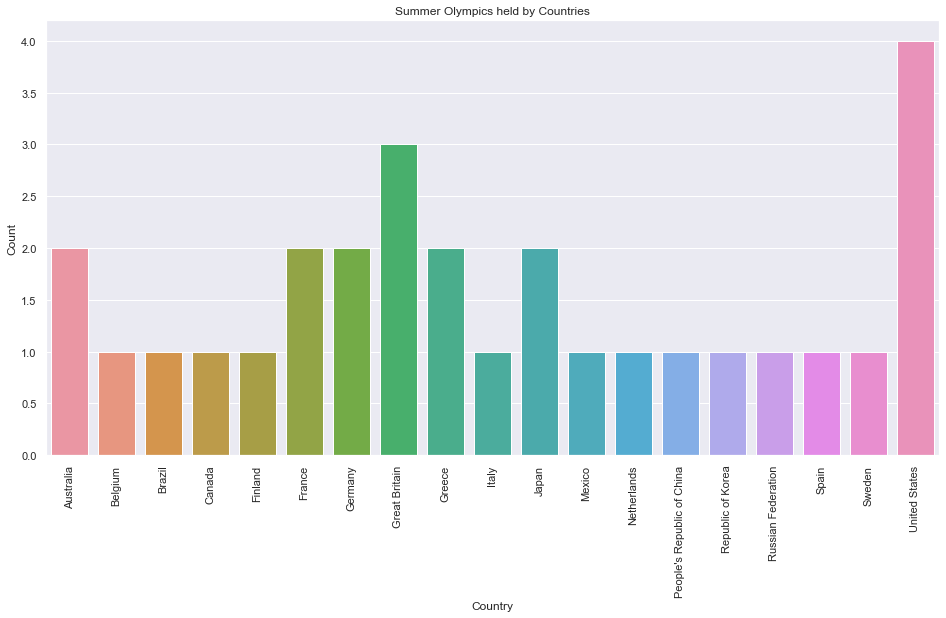

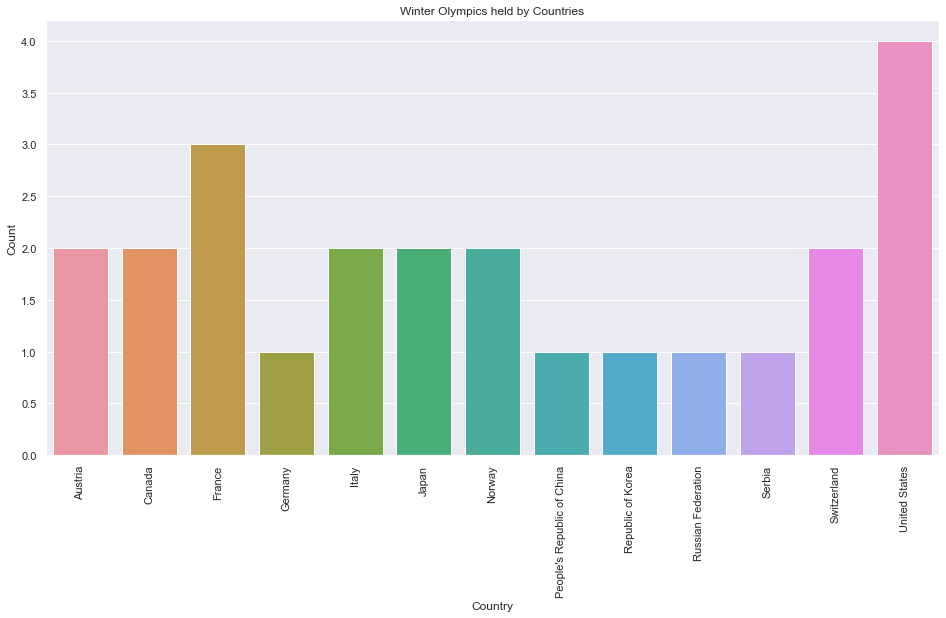

In [48]:
# Number of times each countries hosted the olympics
summer_count = summer_olympics_data.groupby(['country_name'])['year'].count() 
winter_count = winter_olympics_data.groupby(['country_name'])['year'].count()

# Summer Olympics
def freq_plot(data, text):
    plot_one = sns.barplot(x=data.index, y=data.values)
    plot_one.set_xticklabels(plot_one.get_xticklabels(),rotation = 90)
    plot_one.set_title(text + ' Olympics held by Countries')
    plot_one.set_xlabel('Country')
    plot_one.set_ylabel('Count')
    plt.show()
    freq_fig = plot_one.get_figure()
    freq_fig.savefig(results_dir + text + '-' + 'count.png')
    
freq_plot(summer_count, 'Summer')
freq_plot(winter_count, 'Winter')

## Q2. How many countries have hosted Olympics till now?

In [19]:
summer_hosts = winter_olympics_data['country_code'].unique()
winter_hosts = summer_olympics_data['country_code'].unique()

distinct_countries = [*summer_hosts, *winter_hosts]
countries_set = set(distinct_countries)

print("\nNumber of Countries hosted Olympics: ", len(countries_set))


Number of Countries hosted Olympics:  23


## Q3. What are the top 10 expensive olympic games conducted till date?

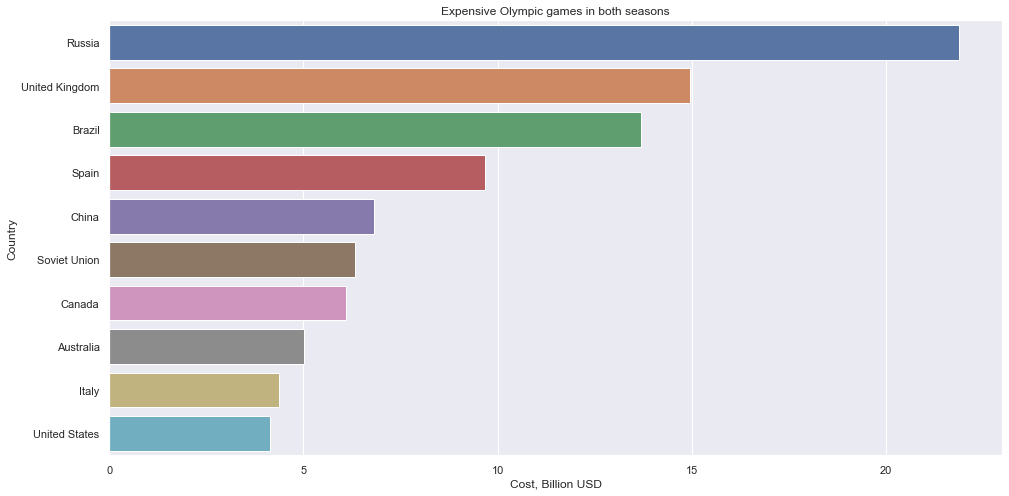

In [12]:
olympics_costs[col_name[0]] = olympics_costs[col_name[0]].astype(float).fillna(olympics_costs[col_name[0]].median())
expensive_olympics = olympics_costs.sort_values(col_name[0], ascending=False).nlargest(10, col_name[0])

plot_two = sns.barplot(x=col_name[0], y=col_name[2], data=expensive_olympics, ci=None)
plot_two.set_title('Expensive Olympic games in both seasons')
expensive_games = plot_two.get_figure()
expensive_games.savefig(results_dir + 'expensive-games.png')

## Q4. Comparision between Summer & Winter Olympics costs over the years

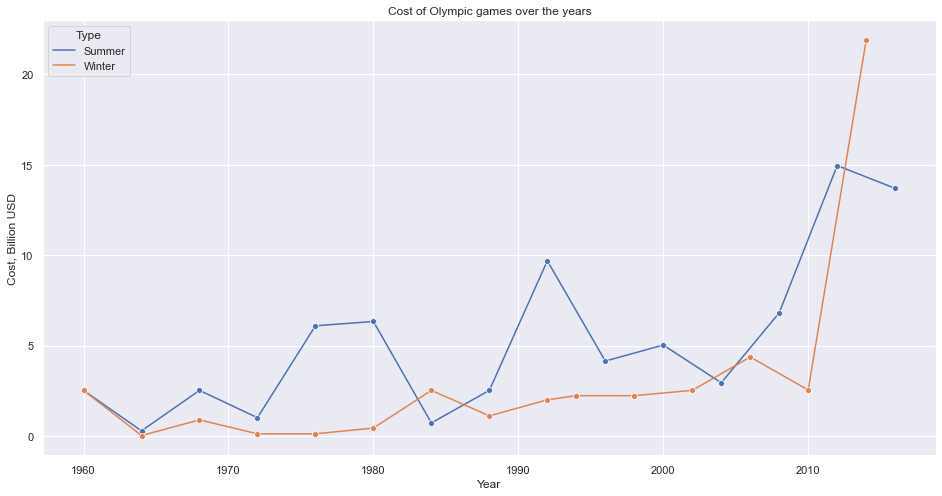

In [13]:
plot_three = sns.lineplot(data=olympics_costs, x="Year", y=col_name[0], hue="Type", marker='o')
plot_three.set_title('Cost of Olympic games over the years')
cost_time_series = plot_three.get_figure()
cost_time_series.savefig(results_dir + 'cost-over-years.png')

## Q5. Which is the most Expensive Summer and Winter Game?

In [14]:
summer_games = olympics_costs[olympics_costs['Type']=='Summer']
winter_games = olympics_costs[olympics_costs['Type']=='Winter']

expensive_summer = summer_games[summer_games[col_name[0]] == summer_games[col_name[0]].max()]
expensive_winter = winter_games[winter_games[col_name[0]] == winter_games[col_name[0]].max()]

print("\nMost Expensive Summer Olympic game : {}, Cost in Billions : {}".format(expensive_summer['Games'].iloc[0],\
                                                                                expensive_summer[col_name[0]].iloc[0]))
print("\nMost Expensive Winter Olympic game : {}, Cost in Billions : {}".format(expensive_winter['Games'].iloc[0],\
                                                                                expensive_winter[col_name[0]].iloc[0]))


Most Expensive Summer Olympic game : London, Cost in Billions : 14.957

Most Expensive Winter Olympic game : Sochi, Cost in Billions : 21.89


## Q6. Are Winter Games costlier than Summer Games?

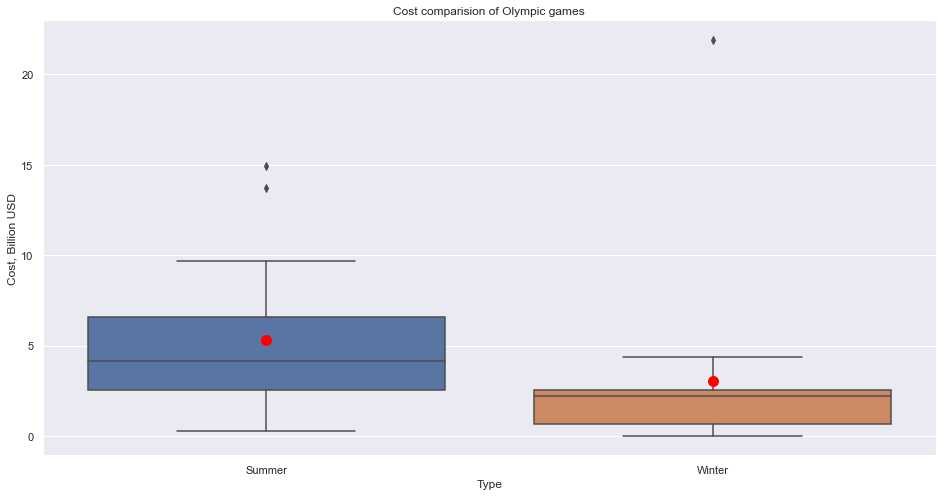

In [40]:
plot_four = sns.boxplot(x='Type', y=col_name[0], data=olympics_costs, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor":"Red",
                       "markeredgecolor": "Red",
                       "markersize": "10"})
plot_four.set_title('Cost comparision of Olympic games')
plt.show()

cost_comparsion = plot_four.get_figure()
cost_comparsion.savefig(results_dir + 'cost-comparision.png')

## Q7. Olympic Cities - Total Revenue vs Profit or Loss

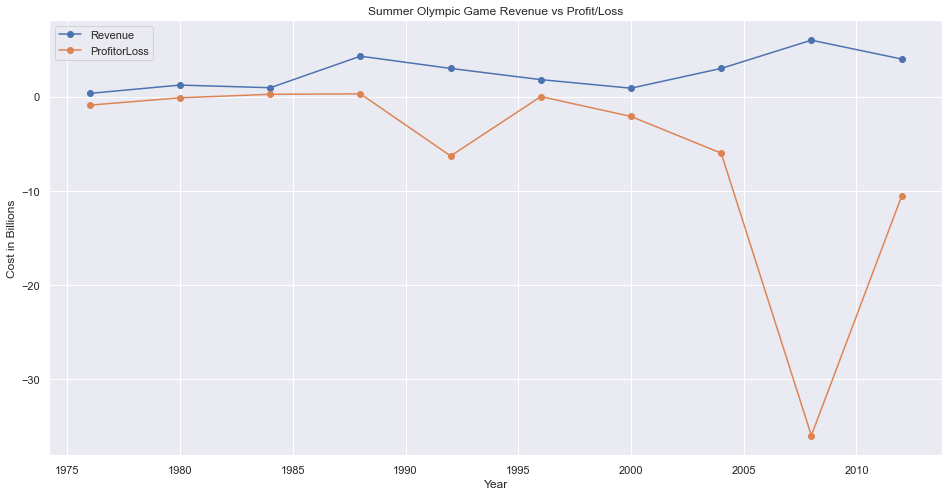

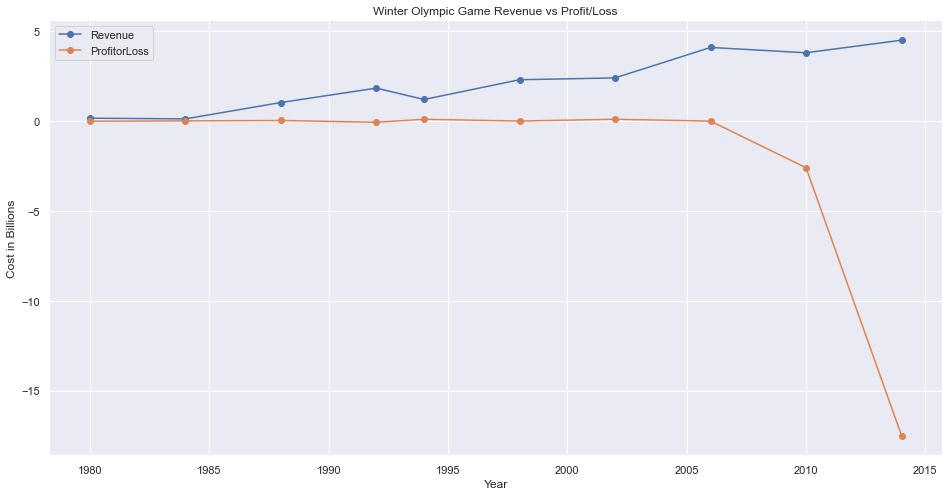

In [15]:
sel_cols = ['City', 'Game','Year','Revenue', 'ProfitorLoss', 'Cost']

# Data Preprocessing
clean_data = cost_revenue.dropna()

clean_data[sel_cols[3]] = clean_data[sel_cols[3]].str.replace(",", "")
clean_data[sel_cols[4]] = clean_data[sel_cols[4]].str.replace(",","")
clean_data[sel_cols[5]] = clean_data[sel_cols[5]].str.replace(",","")

convert_dict = {sel_cols[3]: 'int64',sel_cols[4]: 'int64', sel_cols[5]: 'int64'}
clean_data = clean_data.astype(convert_dict)

clean_data[sel_cols[4]] = clean_data[sel_cols[3]] - clean_data[sel_cols[5]]   
clean_data[sel_cols[3:6]] = clean_data[sel_cols[3:6]] / 10**9

# Plotting the data
summer_revenue_data = clean_data[clean_data['Game'] == 'Summer'][sel_cols]
winter_revenue_data = clean_data[clean_data['Game'] == 'Winter'][sel_cols]

def plot_chart(df, cols, text):
    df.plot(x=cols[0], y=cols[1:], kind="line", marker='o')
    plt.xlabel("Year")
    plt.ylabel("Cost in Billions")
    plt.title(text + " Olympic Game Revenue vs Profit/Loss")
    plt.savefig(results_dir + text + '-profit-loss.png')
    plt.show()

plot_chart(summer_revenue_data, sel_cols[2:5] ,'Summer')
plot_chart(winter_revenue_data, sel_cols[2:5] ,'Winter')

## Q8. Broadcast Revenue Analysis

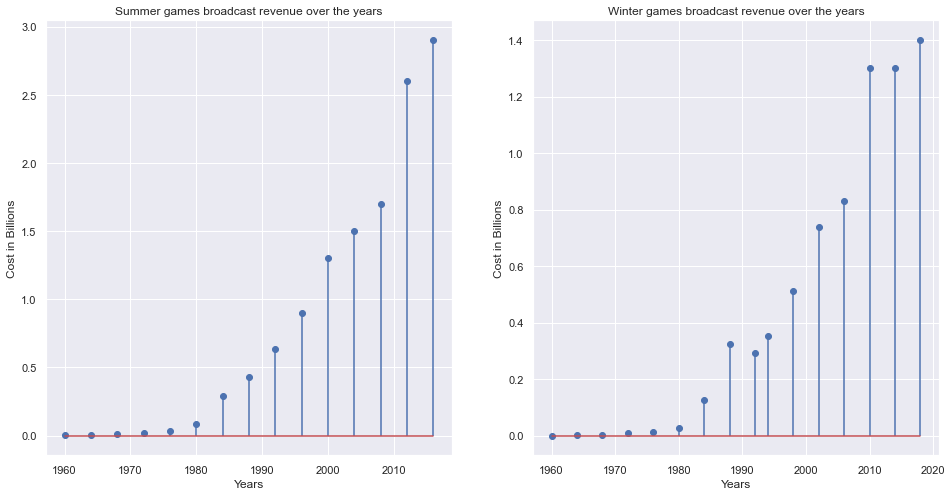

In [16]:
# Data Preprocessing
replace_values = {"K":"000", "M":"000000", "B":"000000000"}
broadcast_revenue['Broadcast Revenue'] = broadcast_revenue['Broadcast Revenue'].replace(replace_values, regex=True)

def convert_string(value):
    value = str(value).replace('$', "")
    substr = "."
    if substr in value:
        value = value.replace(substr, "").replace("0","",1)
    return int(value)/10**9

broadcast_revenue['Broadcast Revenue'] = broadcast_revenue['Broadcast Revenue'].apply(convert_string)
sel_cols = ['Year', 'Broadcast Revenue']

# Analysis and plotting
summer_filtered = broadcast_revenue[broadcast_revenue['Game Type'] == 'Summer'][sel_cols]
winter_filtered = broadcast_revenue[broadcast_revenue['Game Type'] == 'Winter'][sel_cols]

fig, (ax1, ax2) = plt.subplots(1, 2)

def plot_revenue_chart(df, cols, ax, text):
    ax.set_title(text + ' games broadcast revenue over the years')
    ax.stem(df[cols[0]], df[cols[1]])
    ax.set_xlabel('Years')
    ax.set_ylabel('Cost in Billions')
    fig.show()

plot_revenue_chart(summer_filtered, sel_cols, ax1,'Summer')
plot_revenue_chart(winter_filtered, sel_cols, ax2,'Winter')
fig.savefig(results_dir + 'broadcast-revenue.png')

# Olympics Bid Analysis

## Q9. Are the Countries interested in hosting Olympics in recent times?

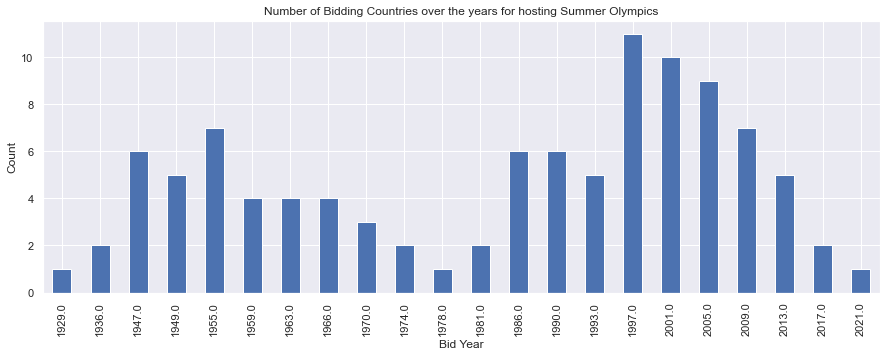

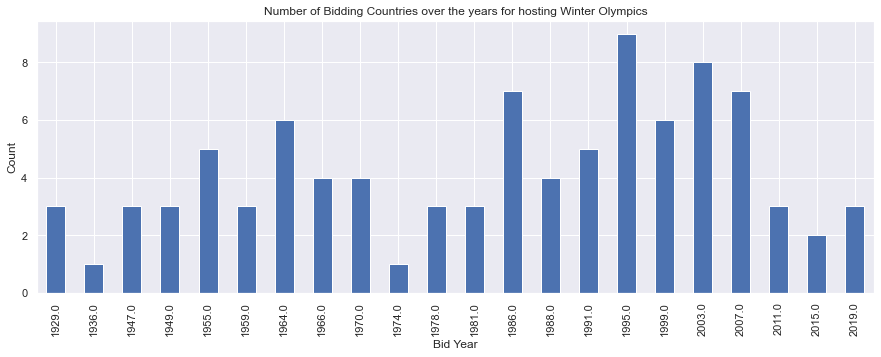

In [17]:
def plot_bid_countries(df, text):
    df.groupby(['Bid_Year'])['Bid_Country'].nunique().plot(kind='bar', xlabel='Bid Year',
                                                                       ylabel='Count', 
                                                                       figsize=(15,5),
                                                                       title = 'Number of Bidding Countries over the years for hosting ' + text +' Olympics')
    plt.savefig(results_dir + text + '-bidcount.png')
    plt.show()

plot_bid_countries(summer_bid_year_df, 'Summer')
plot_bid_countries(winter_bid_year_df, 'Winter')

## Q10. Countries Participation in Bidding process for all the years

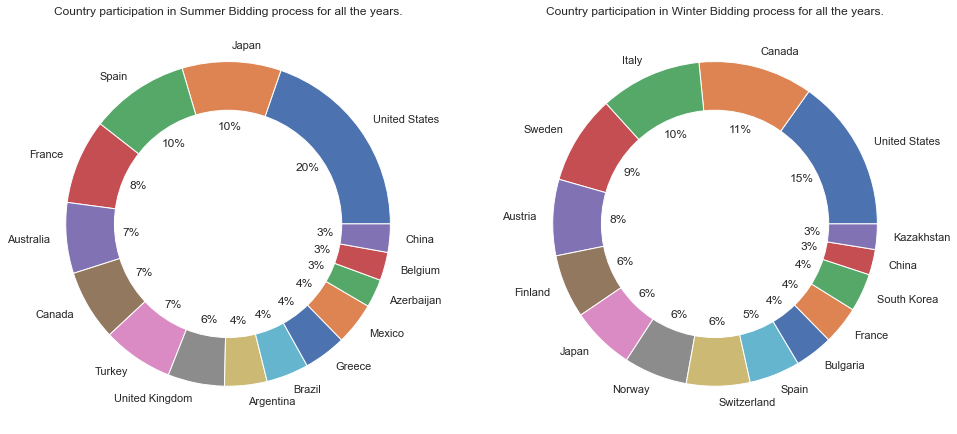

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2)

def plot_donut(df, axis, text):
    df.groupby(['Bid_Country'])['Bid_Year'].nunique().nlargest(15, keep='first').plot(kind='pie',
                                                                                  ax=axis,
                                                                                  y='Bid_Year',
                                                                                  ylabel="",
                                                                                  subplots=True,
                                                                                  figsize=(10,10),
                                                                                  autopct='%1.0f%%')
    axis.add_patch(plt.Circle( (0,0), 0.7, color='white'))
    axis.set_title('Country participation in ' + text +' Bidding process for all the years.')

plot_donut(summer_bid_year_df, ax1, 'Summer')
plot_donut(winter_bid_year_df, ax2,'Winter')
fig.savefig(results_dir + 'country-participation.png')
fig.show()

## Q11. Bidding Outcome Analysis

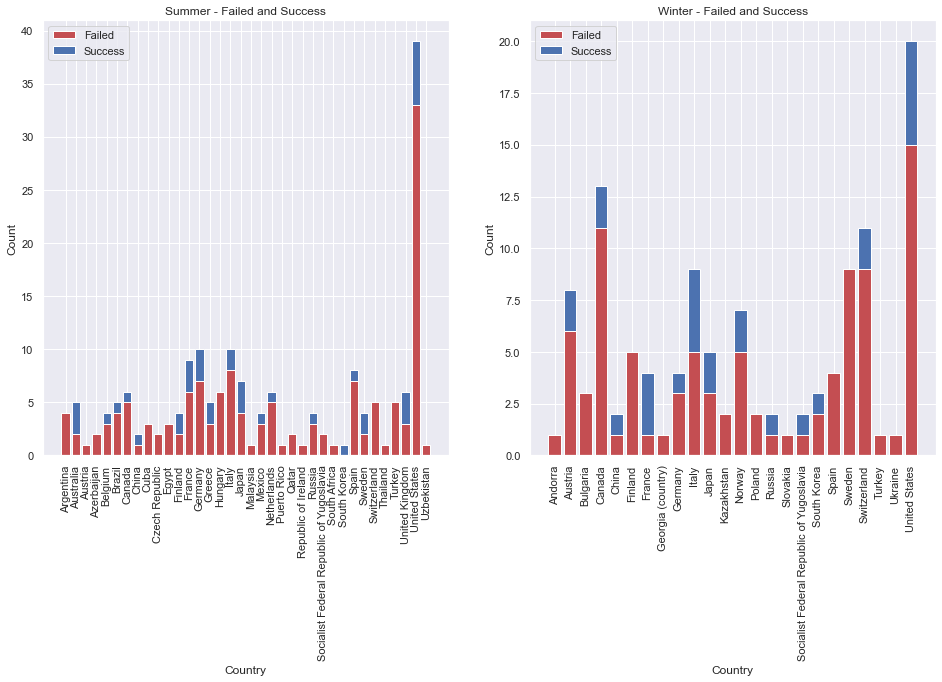

In [54]:
fig, axes = plt.subplots(1,2)

# Data Preprocessing
def evaluate(strinput):
    data = literal_eval(str(strinput))
    return data

def flatten_inputs(inputlist):
    flat_list = [listitem for sublist in inputlist for listitem in sublist]
    return flat_list

def process_df(df):
    cols = df.columns
    for colindex in cols[2:]:
        df[colindex] = df[colindex].apply(evaluate)
    flatten_df = df.groupby(cols[0])[cols[2:]].agg(flatten_inputs)
    for col in cols[2:]:
        flatten_df[col] = flatten_df[col].apply(lambda x : len(x))
    return flatten_df

# Plotting Data
def plot_data(inputdf, axis, text):
    axes[axis].bar(inputdf.index, inputdf['Failed_Bids'], color='r',  label='Failed')
    axes[axis].bar(inputdf.index, inputdf['Success_Bids'], color='b',  bottom=inputdf['Failed_Bids'], label='Success')
    axes[axis].set_ylabel('Count')
    axes[axis].set_xlabel('Country')
    axes[axis].set_title(text + ' - Failed and Success')
    axes[axis].set_xticklabels(inputdf.index, rotation=90)
    axes[axis].legend()
    fig.show()

plot_data(process_df(summer_bid_country_df), 0, 'Summer')
plot_data(process_df(winter_bid_country_df), 1, 'Winter')
fig.savefig(results_dir + 'bidding-outcomes.png')

## Q12. Countries that hosted Olympics

In [50]:
s_count = summer_olympics_data.groupby(['country_code'])['year'].count() 
w_count = winter_olympics_data.groupby(['country_name'])['year'].count()
total_olympics_count = pd.merge(s_count, w_count, how='outer', right_index=True, left_index=True).fillna(0).astype(int)

total_olympics_count = total_olympics_count.rename({"year_x":"summer_count", "year_y":"winter_count"}, axis='columns')
total_olympics_count['total'] = total_olympics_count['summer_count'] + total_olympics_count['winter_count']
total_olympics_count['Country_Name'] = total_olympics_count.index.map(lambda x : country_codes[country_codes['country_code'] == x]['country_name'])
total_olympics_count.rename(index=alias_names,inplace=True)

fig = px.choropleth(total_olympics_count, locations=total_olympics_count.index,
                    color="total",
                    hover_name="Country_Name",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    autosize=True,
    width=900,
    height=500,
    title_text = 'Total Number of Olympics conducted by each country over all the years',
)
fig.write_html(results_dir + "olympics-geography.html")
fig.show()

## Q13. Cost per event  and Cost per athelete

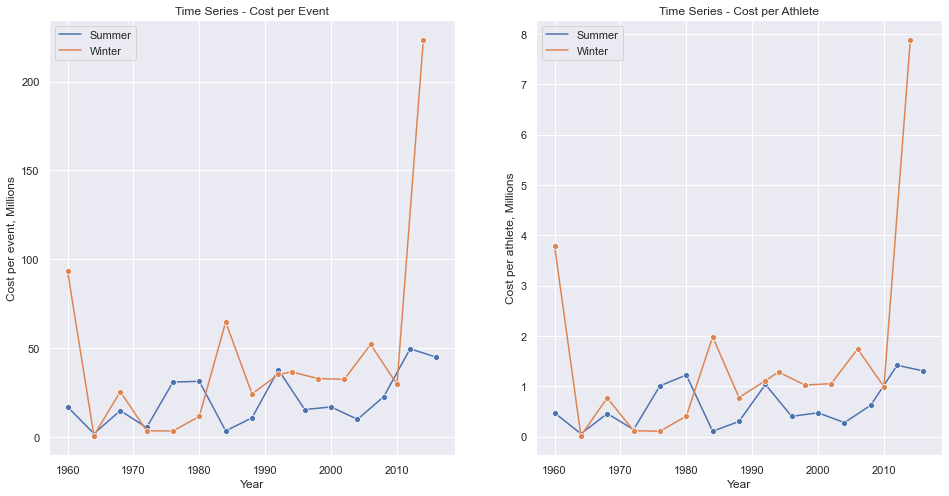

In [19]:
fig, axes = plt.subplots(1,2)

new_cols = ['Cost per event, Millions', 'Cost per athlete, Millions']

olympics_costs[new_cols[0]] = (olympics_costs[col_name[0]] * 1000) / olympics_costs['Events'] 
olympics_costs[new_cols[1]] = (olympics_costs[col_name[0]] * 1000) / olympics_costs['Athletes'] 

def plot_chart(inputdf, axis, text, col_name):
    sns.lineplot(data=inputdf, x="Year", y=col_name, hue="Type", marker='o', ax=axes[axis])
    axes[axis].set_ylabel(col_name)
    axes[axis].set_xlabel('Year')
    axes[axis].set_title(text)
    axes[axis].legend()
    fig.show()

plot_chart(olympics_costs, 0, 'Time Series - Cost per Event', new_cols[0])
plot_chart(olympics_costs, 1, 'Time Series - Cost per Athlete', new_cols[1])

## Q14. Unestimated Costs of Olympic games

In [25]:
cost_overrun_df = olympics_costs.dropna(subset=[col_name[1]])
fig = px.scatter(cost_overrun_df, x="Games", y="Year", size=col_name[1],
                 hover_name=col_name[1], size_max=60, title='Cost Overrun(%) in Olympic games for different years.')
fig.show()

## Q15. Total Medals won by the host countries till now in Olympic games

In [32]:
medal_data = medal_data.replace(alias_names)
filtered_data = medal_data[medal_data['country_code'].isin(countries_set)]\
                                            .drop_duplicates(subset=['country_code']).nlargest(10, 'total')
fig = px.bar_polar(filtered_data, r="total",
                   theta='country', color='total',
                   title='Top 10 olympic host countries in total medal count for all the years.')
fig.show()

## Q16. Medals won by Countries when a Host vs Not Host

In [ ]:
# TODO 

# Economic Variable Analysis

In [ ]:
# Helper Methods
def plot_indicator_change(df, title, game_type):
    x_value = df['Country'] + "-" + df['Year'].astype(str)
    fig = go.Figure(data=[
        go.Bar(name='Before', x=x_value, y=df['Before'].values),
        go.Bar(name='After', x=x_value, y=df['After'].values),
    ])
    fig.update_layout(barmode='group',width=900, height=500, title_text ='Change in {} value - Before and after hosting - {} Olympics'.format(title, game_type))
    fig.show()

    
# Main logic
def process_economic_variables(inputdf, gtype):
    
    cols = ['Year', 'Country', 'Before' ,'After']
    
    for key, value in economic_variables.items():
        eco_df = wb.data.DataFrame(key)
        eco_df = eco_df.rename(columns=lambda x: int(x.replace('YR', '')))
        eco_df = eco_df[year_list]
        eco_df = eco_df.transpose().fillna(method='backfill').fillna(method='ffill').transpose()
        
        change_df = pd.DataFrame(columns = cols)
        row_data = {cols[0]:None, cols[1]:None, cols[2]:None, cols[3]:None}
        
        for row in inputdf.itertuples(index=False):
            row_data[cols[0]] = row.year
            row_data[cols[1]] = row.country_code
            row_data[cols[2]] = eco_df.loc[row.country_code, [i for i in range(row.year-4, row.year)]].mean()
            row_data[cols[3]] = eco_df.loc[row.country_code, [i for i in range(row.year, row.year+5)]].mean()
            change_df = change_df.append(row_data, ignore_index=True)

        change_df.dropna(inplace=True)
        plot_indicator_change(change_df, value, gtype)

process_economic_variables(summer_host_info, 'Summer')
process_economic_variables(winter_host_info, 'Winter')